In [1]:
%matplotlib widget
from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style> <style>.jp-Notebook { --jp-notebook-max-width: 98%;}</style>"))
from pyobjcryst.crystal import create_crystal_from_cif
from wipow.id06lvp import ID06LVP_LiveWidget

v = ID06LVP_LiveWidget(poni_filename="lab6_191122.poni", data_src="run5_Pup1/Pup1_%04d.edf")

v.add_crystal_cif("http://crystallography.net/cod/9000493.cif") # MgO

display(v)

ID06LVP_LiveWidget(children=(Tab(children=(HBox(children=(VBox(children=(Output(), Output(), IntSlider(value=0…

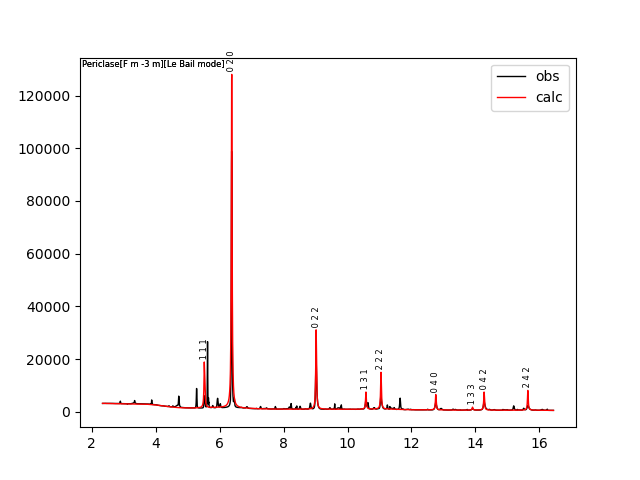

Profile fitting finished.
Remember to use SetExtractionMode(False) on the PowderPatternDiffraction object
to disable profile fitting and optimise the structure.


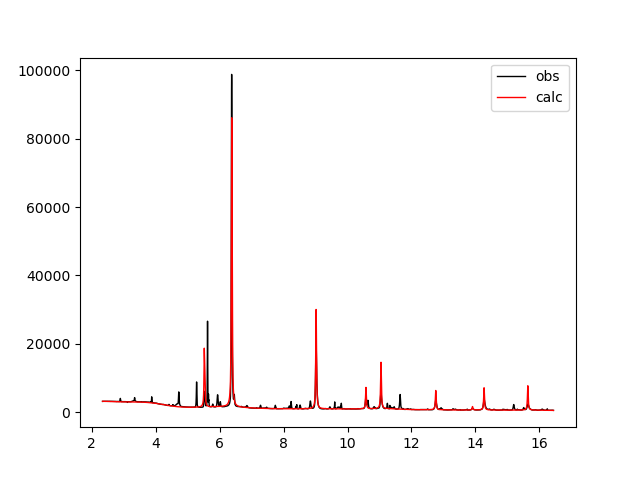

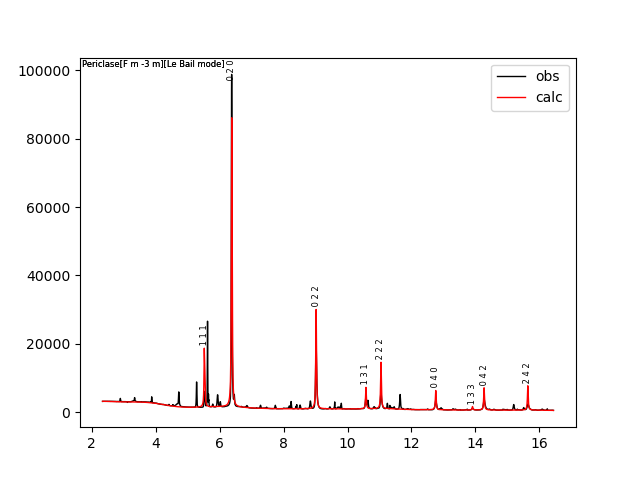

a= 4.214853473002134
Profile parameters: Refinable Object:, with 8 parameters
#0#U:     0.000000000000 Fixed
#1#V:     0.000000000000 Fixed
#2#W:     0.000845140784 Fixed
#3#Eta0:     0.744829300139 Fixed
#4#Eta1:     1.000000000000 Fixed
#5#Asym0:     1.000000000000 Fixed
#6#Asym1:     0.000000000000 Fixed
#7#Asym2:     0.000000000000 Fixed


In [4]:
# If one phase dominates, profile fitting can be done (after manually adjusting the lattice parameters in the widgets)
# TODO: avoid duplicating the plot figure
if False:
    import matplotlib.pyplot as plt
    pdiff = v.crystal_phases[0]['diffraction']
    v.powderpattern_background.UnFixAllPar()
    v.powderpattern_background.OptimizeBayesianBackground()
    v.powder_pattern.FitScaleFactorForIntegratedRw()
    v.powder_pattern.quick_fit_profile(pdiff=pdiff, init_profile=True, plot=False, backgd=False,
                                       constant_width=True, width=False, eta=True, cell=True)
    v.crystal_phases[0]["widget"].update_lattice()  # manual update of the lattice in the widget
    fig = plt.figure()
    v.powder_pattern.plot(hkl=True, fig=fig)
    print("a=",v.crystal_phases[0]["crystal"].a)
    print("Profile parameters:", pdiff.GetProfile())